In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("heart.csv")

#  Data Analysis

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

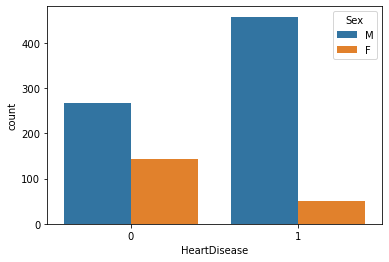

In [5]:
sns.countplot(x='HeartDisease',data=df,hue = 'Sex')

         2/3 male and 1/4 female have heart disease

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

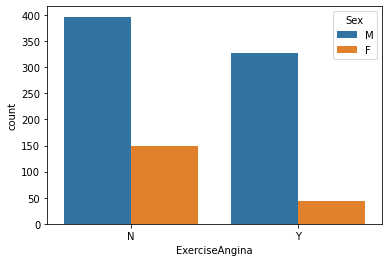

In [6]:
sns.countplot(x='ExerciseAngina',data=df,hue = 'Sex')


It is concluded that about 25% of female and 47.2% of male have exercise 
angina.

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

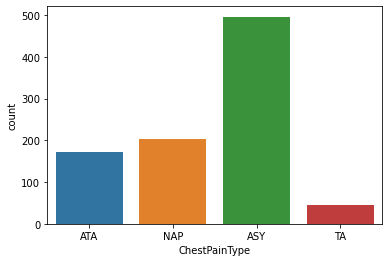

In [7]:
sns.countplot(x='ChestPainType',data=df)

ASY type Chest Pain is commonly found among people and TA type is rarely found

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

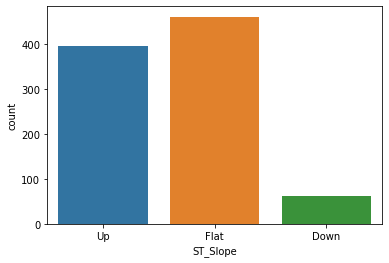

In [8]:
sns.countplot(x='ST_Slope',data=df)

Most of the people have either Up or Flat ST_ Slope only about 5.3% people have Down 
ST_slope

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

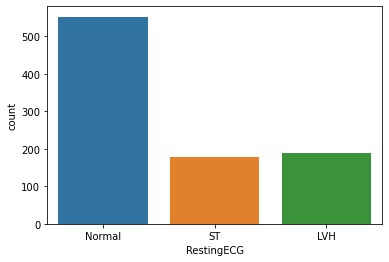

In [9]:
sns.countplot(x='RestingECG',data=df)

More than 50% people have normal ECG in resting position while ST and LVH condition is 
approximately equally distributed among rest of people

#  Data Cleaning

In [10]:
#function to create dummy column for Resting_ECG
def ecg(x):
    if x == 'Normal':
        return 0
    elif x=='ST':
        return 1
    else:
        return 2

In [11]:
df['Restin_ECG'] = df['RestingECG'].apply(ecg)

In [12]:
#function to create dummy column for STslope
def STslope(x):
    if x == 'Up':
        return 2
    elif x=='Flat':
        return 1
    else:
        return 2

In [13]:
df['STslope'] = df['ST_Slope'].apply(STslope)

In [14]:
#function to create dummy column Chest Pain Type
def pain(x):
    if x == 'ATA':
        return 1
    elif x=='NAP':
        return 2
    elif x=='ASY':
        return 3
    else:
        return 4

In [15]:
df['Chest_paintype'] = df['ChestPainType'].apply(pain)

In [16]:
#function to create dummy column for Sex
def male(x):
    if x=='M':
        return 1
    else:
        return 0
#function to create dummy column for Exercise Angina
def tr(x):
    if x=='Y':
        return 1
    else:
        return 0

In [17]:
df['Male']= df['Sex'].apply(male)
df['Ex-Angina'] = df['ExerciseAngina'].apply(tr)

In [18]:
#Drop all the other columns whose dummy are created
df.drop('ChestPainType',axis=1,inplace=True)
df.drop('Sex',axis=1,inplace=True)
df.drop('RestingECG',axis=1,inplace=True)
df.drop('ST_Slope',axis=1,inplace=True)
df.drop('ExerciseAngina',axis=1,inplace=True)

#Print Data after cleaning is completed
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Restin_ECG,STslope,Chest_paintype,Male,Ex-Angina
0,40,140,289,0,172,0.0,0,0,2,1,1,0
1,49,160,180,0,156,1.0,1,0,1,2,0,0
2,37,130,283,0,98,0.0,0,1,2,1,1,0
3,48,138,214,0,108,1.5,1,0,1,3,0,1
4,54,150,195,0,122,0.0,0,0,2,2,1,0


In [19]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Restin_ECG', 'STslope', 'Chest_paintype', 'Male',
       'Ex-Angina'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Restin_ECG', 'STslope', 'Chest_paintype', 'Male',
       'Ex-Angina']]
y = df['HeartDisease']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lm = LinearRegression()

In [111]:
lm.fit(X_train,y_train)

LinearRegression()

In [112]:
print(lm.intercept_)

0.8783304261790501


In [113]:
predictions = lm.predict(X_test)

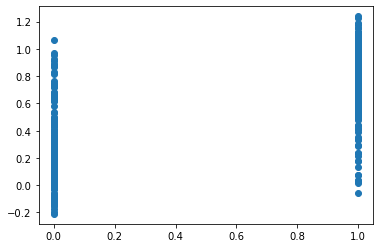

In [114]:
plt.scatter(y_test,predictions)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


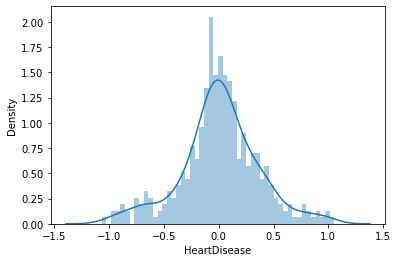

In [115]:
sns.distplot((y_test-predictions),bins=50);

In [116]:
from sklearn import metrics

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2603202913370167
MSE: 0.1267592682015667
RMSE: 0.3560326785585372


# Logistic Regression 

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
predictions = logmodel.predict(X_test)

In [121]:
from sklearn.metrics import classification_report,confusion_matrix

In [122]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       170
           1       0.85      0.87      0.86       198

    accuracy                           0.85       368
   macro avg       0.85      0.85      0.85       368
weighted avg       0.85      0.85      0.85       368



In [123]:
print(confusion_matrix(y_test,predictions))

[[139  31]
 [ 25 173]]


# KNN

In [38]:
# making copy of our data set
df1 = df
df1['Heart-disease'] = df1['HeartDisease']
df1.drop('HeartDisease',axis=1,inplace =True)

In [39]:
df1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Restin_ECG,STslope,Chest_paintype,Male,Ex-Angina,Heart-disease
0,40,140,289,0,172,0.0,0,2,1,1,0,0
1,49,160,180,0,156,1.0,0,1,2,0,0,1
2,37,130,283,0,98,0.0,1,2,1,1,0,0
3,48,138,214,0,108,1.5,0,1,3,0,1,1
4,54,150,195,0,122,0.0,0,2,2,1,0,0


In [40]:
#scaling the data
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(df1.drop('Heart-disease',axis=1))


StandardScaler()

In [43]:
scaled_features = scaler.transform(df1.drop('Heart-disease',axis=1))

In [44]:
df_feat = pd.DataFrame(scaled_features,columns=df1.columns[:-1])
df_feat.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Restin_ECG,STslope,Chest_paintype,Male,Ex-Angina
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,-0.749180,1.002181,-1.705573,0.515952,-0.823556
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,-0.749180,-0.997824,-0.530992,-1.938163,-0.823556
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0.492241,1.002181,-1.705573,0.515952,-0.823556
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,-0.749180,-0.997824,0.643588,-1.938163,1.214246
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,-0.749180,1.002181,-0.530992,0.515952,-0.823556


In [45]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Heart-disease'],
                                                    test_size=0.4,random_state=101)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)

In [48]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
pred = knn.predict(X_test)

In [50]:
print(confusion_matrix(y_test,pred))

[[132  38]
 [ 35 163]]


In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       170
           1       0.81      0.82      0.82       198

    accuracy                           0.80       368
   macro avg       0.80      0.80      0.80       368
weighted avg       0.80      0.80      0.80       368



In [52]:
# obtaining suitable value of k
error_rate = []
for i in range(1,40):   
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

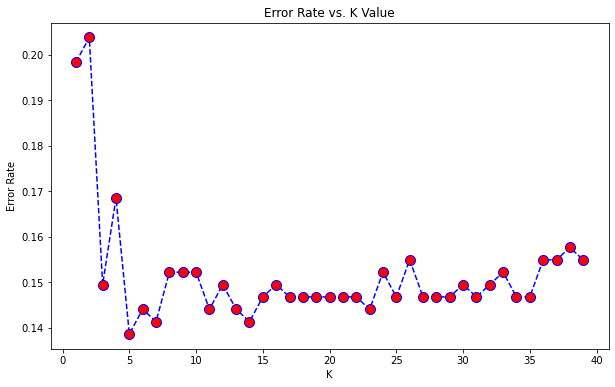

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [54]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[140  30]
 [ 21 177]]


              precision    recall  f1-score   support

           0       0.87      0.82      0.85       170
           1       0.86      0.89      0.87       198

    accuracy                           0.86       368
   macro avg       0.86      0.86      0.86       368
weighted avg       0.86      0.86      0.86       368



#  Decision Tree and Random Forest

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=101)

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtree = DecisionTreeClassifier()

In [58]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
predictions = dtree.predict(X_test)

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       170
           1       0.81      0.81      0.81       198

    accuracy                           0.80       368
   macro avg       0.80      0.79      0.79       368
weighted avg       0.80      0.80      0.80       368



In [61]:
print(confusion_matrix(y_test,predictions))

[[132  38]
 [ 37 161]]


In [62]:
from IPython.display import Image 
from six import StringIO
#from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df1.columns[:-1])
features

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Restin_ECG',
 'STslope',
 'Chest_paintype',
 'Male',
 'Ex-Angina']

In [4]:
# dot_data = StringIO()  
# export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# Image(graph[0].create_png()) 

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
rfc_pred = rfc.predict(X_test)

In [66]:
print(confusion_matrix(y_test,rfc_pred))

[[138  32]
 [ 22 176]]


In [67]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       170
           1       0.85      0.89      0.87       198

    accuracy                           0.85       368
   macro avg       0.85      0.85      0.85       368
weighted avg       0.85      0.85      0.85       368



#  Support Vector Machine

In [68]:
from sklearn.svm import SVC

In [69]:
model = SVC()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=101)

In [71]:
model.fit(X_train,y_train)

SVC()

In [72]:
predictions = model.predict(X_test)

In [73]:
print(confusion_matrix(y_test,predictions))

[[115  55]
 [ 60 138]]


In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       170
           1       0.72      0.70      0.71       198

    accuracy                           0.69       368
   macro avg       0.69      0.69      0.69       368
weighted avg       0.69      0.69      0.69       368



In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {'C' : [100000,10000000,100000000],'gamma': [0.000001,0.0000001,0.00000001]}

In [77]:
gs = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [78]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........................C=100000, gamma=1e-06; total time=   0.1s
[CV 2/5] END ..........................C=100000, gamma=1e-06; total time=   0.1s
[CV 3/5] END ..........................C=100000, gamma=1e-06; total time=   0.0s
[CV 4/5] END ..........................C=100000, gamma=1e-06; total time=   0.0s
[CV 5/5] END ..........................C=100000, gamma=1e-06; total time=   0.1s
[CV 1/5] END ..........................C=100000, gamma=1e-07; total time=   0.0s
[CV 2/5] END ..........................C=100000, gamma=1e-07; total time=   0.0s
[CV 3/5] END ..........................C=100000, gamma=1e-07; total time=   0.0s
[CV 4/5] END ..........................C=100000, gamma=1e-07; total time=   0.0s
[CV 5/5] END ..........................C=100000, gamma=1e-07; total time=   0.0s
[CV 1/5] END ..........................C=100000, gamma=1e-08; total time=   0.0s
[CV 2/5] END ..........................C=100000, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100000, 10000000, 100000000],
                         'gamma': [1e-06, 1e-07, 1e-08]},
             verbose=3)

In [79]:
gs.best_params_

{'C': 10000000, 'gamma': 1e-07}

In [80]:
gs.best_estimator_

SVC(C=10000000, gamma=1e-07)

In [81]:
gs_predictions = gs.predict(X_test)

In [82]:
print(confusion_matrix(y_test,gs_predictions))

[[141  29]
 [ 29 169]]


In [83]:
print(classification_report(y_test,gs_predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       170
           1       0.85      0.85      0.85       198

    accuracy                           0.84       368
   macro avg       0.84      0.84      0.84       368
weighted avg       0.84      0.84      0.84       368



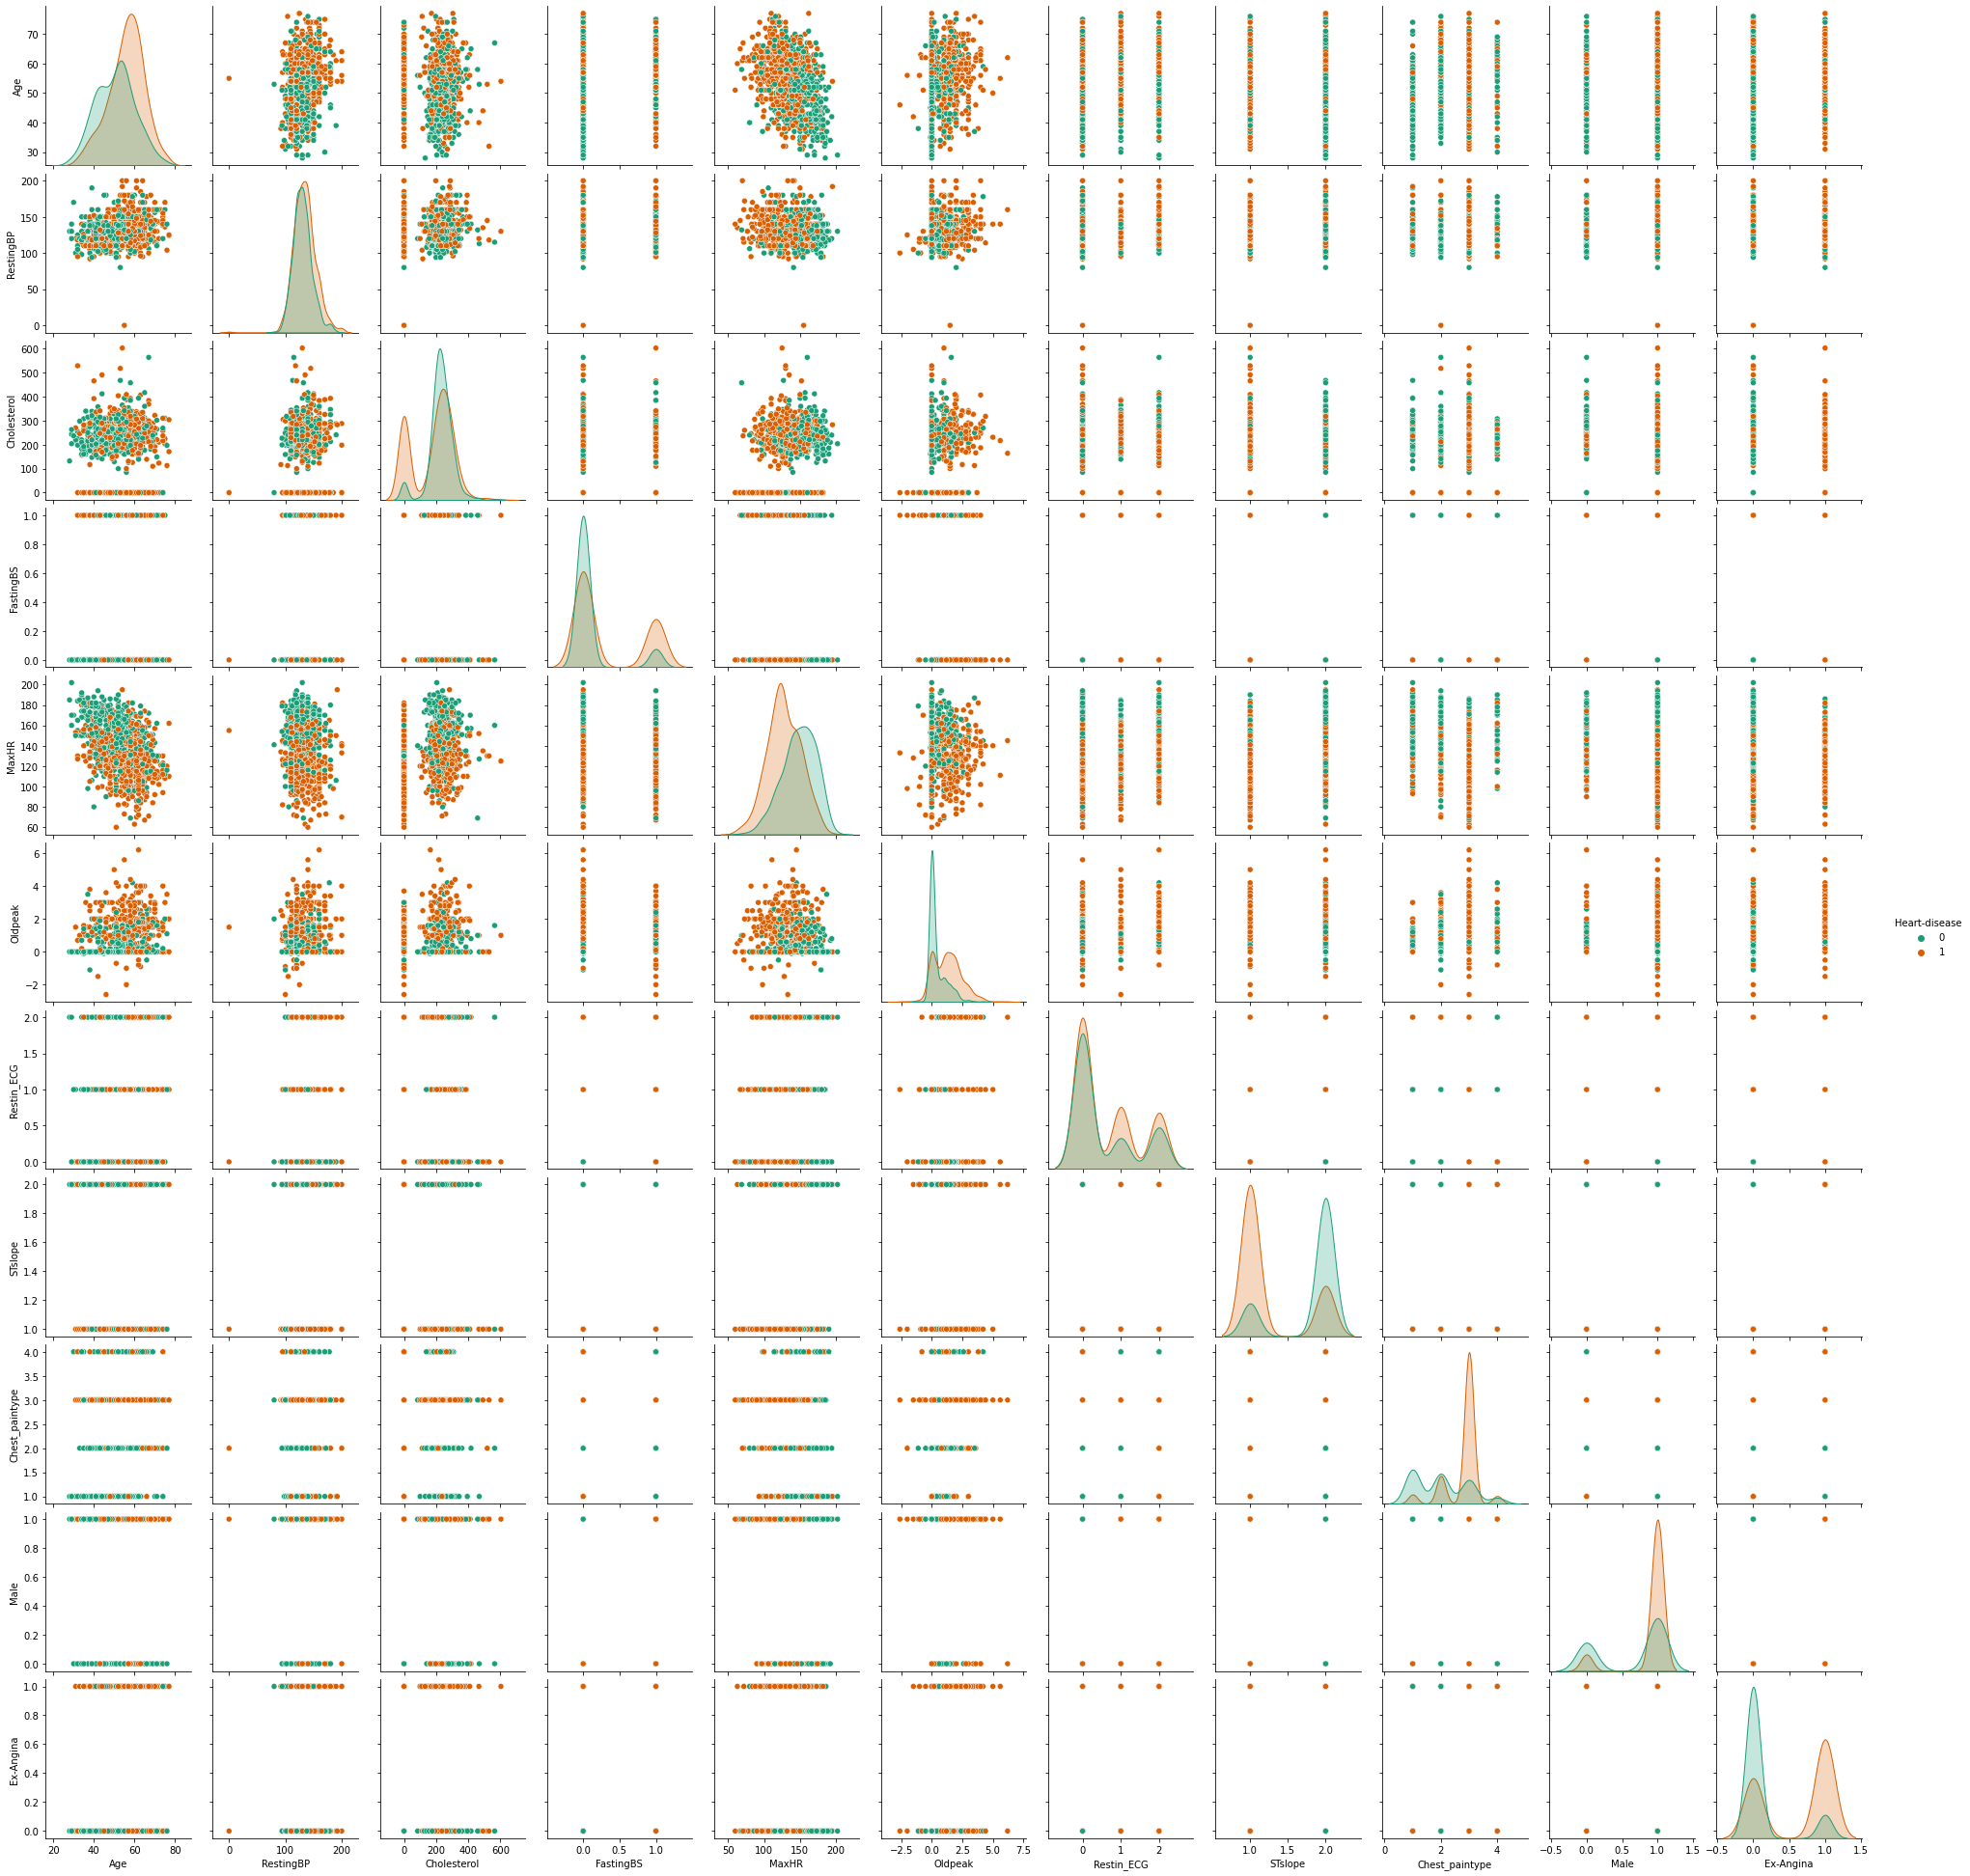

In [84]:
sns.pairplot(df,hue='Heart-disease',palette='Dark2')